<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/%EC%8B%A4%EC%8A%B5%EC%83%98%ED%94%8C_tips_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Assignment 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
data = pd.read_csv("tips.csv")

## Tips Data

In [8]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
data['sex'] = data['sex'].replace({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].replace({'No': 0, 'Yes': 1})
data['time'] = data['time'].replace({'Lunch': 0, 'Dinner': 1})
    
# Ordinal encoding
data['day'] = data['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

In [10]:
data.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


### 1. average tip?

In [11]:
data['tip'].mean()

2.9982786885245902

### 2.Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [12]:
data['tip'].median()

2.9

Hence, Median & mean are almost same.

If the distribution is symmetric then the mean is equal to the median and the distribution will have zero skewness

### 3.Prepare a boxplot for 'tip', are there any outliers?  

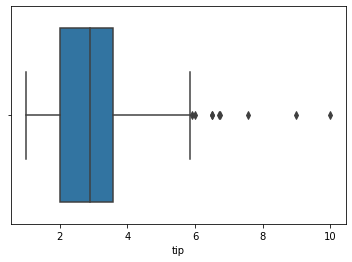

In [13]:
sns.boxplot(x="tip", data=data)

In [14]:
q3, q1 = np.percentile(data.tip, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  2.0
Lower Quatile:-  3.5624999999999996
IQR:-  1.56
Lower range in boxplot is -0.34, & the upper range is, 4.34


### 4.Prepare a boxplot for 'total_bill', are there any outliers?

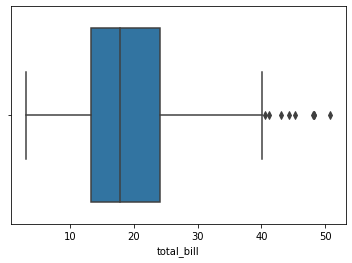

In [15]:
sns.boxplot(x="total_bill", data = data)

In [16]:
q3, q1 = np.percentile(data.total_bill, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  13.3475
Lower Quatile:-  24.127499999999998
IQR:-  10.78
Lower range in boxplot is -2.82, & the upper range is, 29.52


### 5. Gender: what is the percent of females in the data?

In [17]:
data.groupby('sex').size()

sex
0     87
1    157
dtype: int64

In [18]:
x = data.groupby("sex").size()
t = data["sex"].count()
p = x/t * 100
p[0]

35.65573770491803

### 6.Prepare a bar plot with the bars representing the percentage of records for each gender.

In [19]:
cnt = data.groupby(['sex']).count().reset_index()
cnt

,sex,total_bill,tip,smoker,day,time,size
0,0,87,87,87,87,87,87
1,1,157,157,157,157,157,157


In [20]:
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,0,87,87,87,87,87,87,35.655738
1,1,157,157,157,157,157,157,64.344262


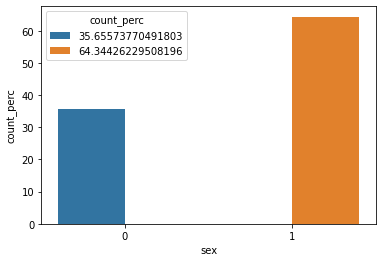

In [21]:
sns.barplot(x="sex",y='count_perc',
            hue = 'count_perc'
            ,data = cnt)

([<matplotlib.patches.Wedge at 0x7f5edf370410>,
 [Text(-0.9901862461361194, 0.47909414311057974, 'Female'),
  Text(0.990186290992146, -0.47909405040265074, 'Male')],
 [Text(-0.5401015888015196, 0.2613240780603162, '35.7%'),
  Text(0.5401016132684432, -0.2613240274923549, '64.3%')])

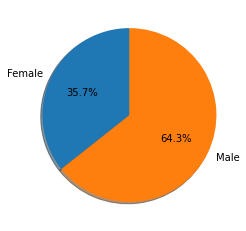

In [22]:
cnt = data.groupby(['sex']).count().reset_index()
cnt
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100 

plt.pie(x='count_perc',data=cnt,labels=['Female', 'Male'], autopct='%1.1f%%',
       shadow=True, startangle=90)


### 7.Does the average tip differ by gender? Does one gender tip more than the other?

In [23]:
data.groupby(["sex"]).mean()['tip']

sex
0    2.833448
1    3.089618
Name: tip, dtype: float64

yes, the avg value of male tip is greater than female tip

### 8. Does the average tip differ by the time of day?

In [24]:
data.groupby(["day","time"]).mean()['tip']

day  time
0    0       2.767705
     1       3.000000
1    0       2.382857
     1       2.940000
2    1       2.993103
3    1       3.255132
Name: tip, dtype: float64

In [25]:
data.groupby(["day"]).mean()['tip']

day
0    2.771452
1    2.734737
2    2.993103
3    3.255132
Name: tip, dtype: float64

In [26]:
data.groupby(["time"]).mean()['tip']

time
0    2.728088
1    3.102670
Name: tip, dtype: float64

### 9. Does the average tip differ by size (number of people at the table)?

In [27]:
data.groupby('size').mean()['tip']

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

### 10. Do smokers tip more than non-smokers?

In [28]:
data.groupby('smoker').sum()['tip']

smoker
0    451.77
1    279.81
Name: tip, dtype: float64

### 11. Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [29]:
data.groupby(['sex','smoker']).mean()['tip']

sex  smoker
0    0         2.773519
     1         2.931515
1    0         3.113402
     1         3.051167
Name: tip, dtype: float64

### 12.Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [30]:
data['pct_tip'] = data['tip']/data['total_bill']

### 13. Does pct_tip differ by gender? Does one gender tip more than the other?

In [31]:
data.groupby(["sex"]).sum()['pct_tip']

sex
0    14.484694
1    24.751136
Name: pct_tip, dtype: float64

### 14. Does pct_tip differ by size (number of people at the table)?

In [46]:
data.groupby(["size"]).sum()['pct_tip']

size
1     0.869168
2    25.852194
3     5.781960
4     5.400113
5     0.707477
6     0.624917
Name: pct_tip, dtype: float64

### 15. Make the gender vs. smoker view using pct_tip - does your inference change?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


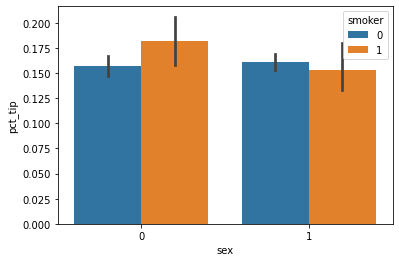

In [33]:
data['sex'].groupby(data["smoker"]).value_counts(normalize=True).rename('pct_tip').reset_index()


x,y,hue = 'sex','pct_tip','smoker'

sns.barplot(x,y,hue,data=data)


### 16. Make a scatter plot of total_bill vs. tip.

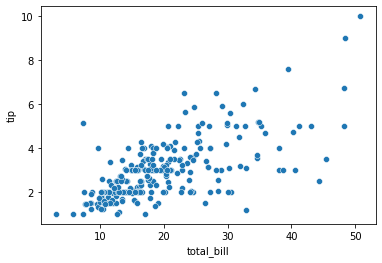

In [34]:
sns.scatterplot(x="total_bill", y = "tip",
               data = data)

### 17. Make a scatter plot of total_bill vs. pct_tip.

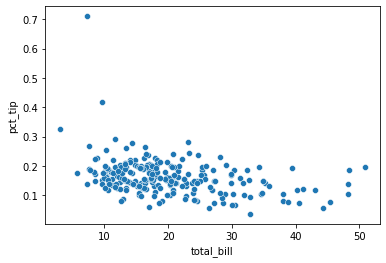

In [35]:
sns.scatterplot(x="total_bill", y = "pct_tip",
               data = data)

In [36]:
data["smoker"].count()

244

### 18. Paired Plot

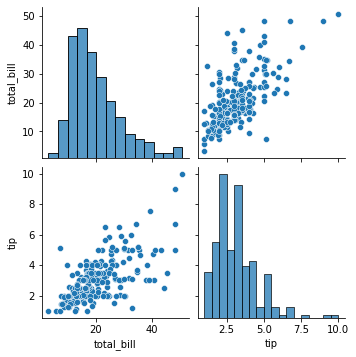

In [37]:
sns.pairplot(data.loc[:, ['total_bill', 'tip']])

In [38]:
#sns.pairplot(data.loc[:, ['total_bill', 'day']])

### 19. Total bill abd Tip ratio

In [39]:
#data['tip_rate'] = (data['tip']/data['total_bill'])*100

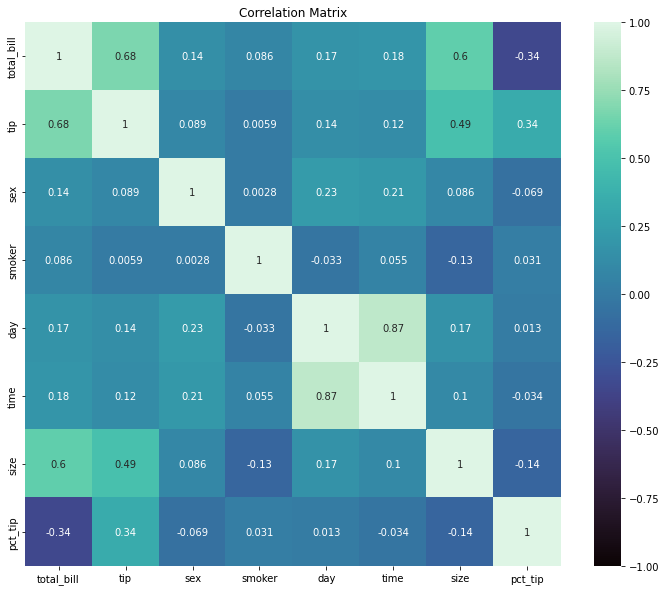

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

### 20. Profile Report

In [47]:
!pip install -U pandas-profiling

     |████████████████████████████████| 248 kB 11.8 MB/s 
     |████████████████████████████████| 10.1 MB 55.6 MB/s 
     |████████████████████████████████| 675 kB 70.2 MB/s 
     |████████████████████████████████| 3.1 MB 62.3 MB/s 
     |████████████████████████████████| 62 kB 781 kB/s 
     |████████████████████████████████| 636 kB 56.2 MB/s 
     |████████████████████████████████| 102 kB 52.2 MB/s 
     |████████████████████████████████| 812 kB 50.9 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=de14c813ea2cb6ff20093f5559961c7b17a8bc00fd378126e55e1e9174c1a69c
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=288e1e01282c3bd51927fd0d22c3612fcec90db30616c358a29ae8e1903eab91
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3

In [44]:
import pandas_profiling

In [45]:
data.profile_report()

AttributeError: ignored

### 21. Z transform

In [ ]:
data.columns

In [ ]:
data_scale_std = data.drop(['sex', 'smoker', 'day', 'time'], axis = 1)

In [ ]:
data_scale_std.describe()

In [ ]:
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

In [ ]:
# scale변환 : 표준정규분포 기준
df_scale_std = scale(data_scale_std)
# scale 변환하면 numpy의 행렬 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = data_scale_std.columns)
df_scale_std.head()

In [ ]:
df_scale_std.describe().round()

In [ ]:
df_scale_std.profile_report()

### 22. Stack & Unstack

In [ ]:
tips_gb = data.groupby(['day','sex']).agg({'size':'sum'})

In [ ]:
tips_gb

In [ ]:
tips_gb.stack()

In [ ]:
tips_us = tips_gb.unstack()

In [ ]:
tips_us

In [ ]:
tips_gb.unstack(0)

In [ ]:
tips_us.stack()

In [ ]:
tips_us.stack(0)

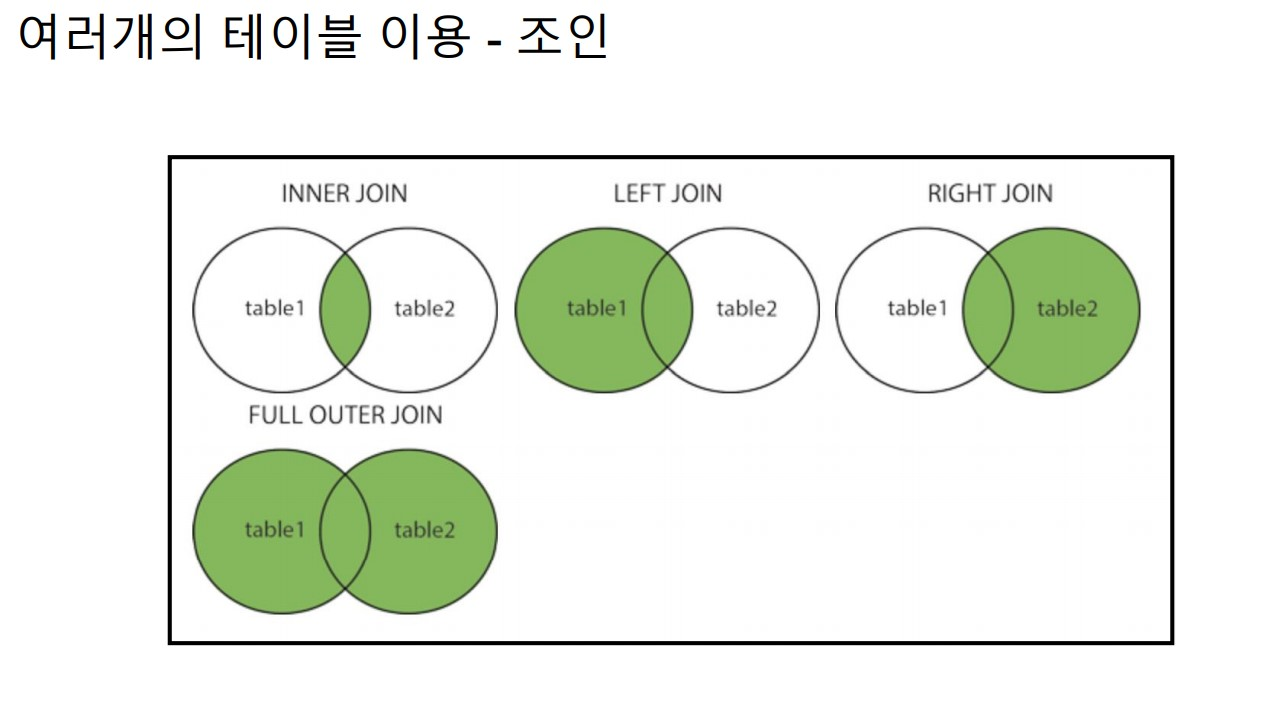

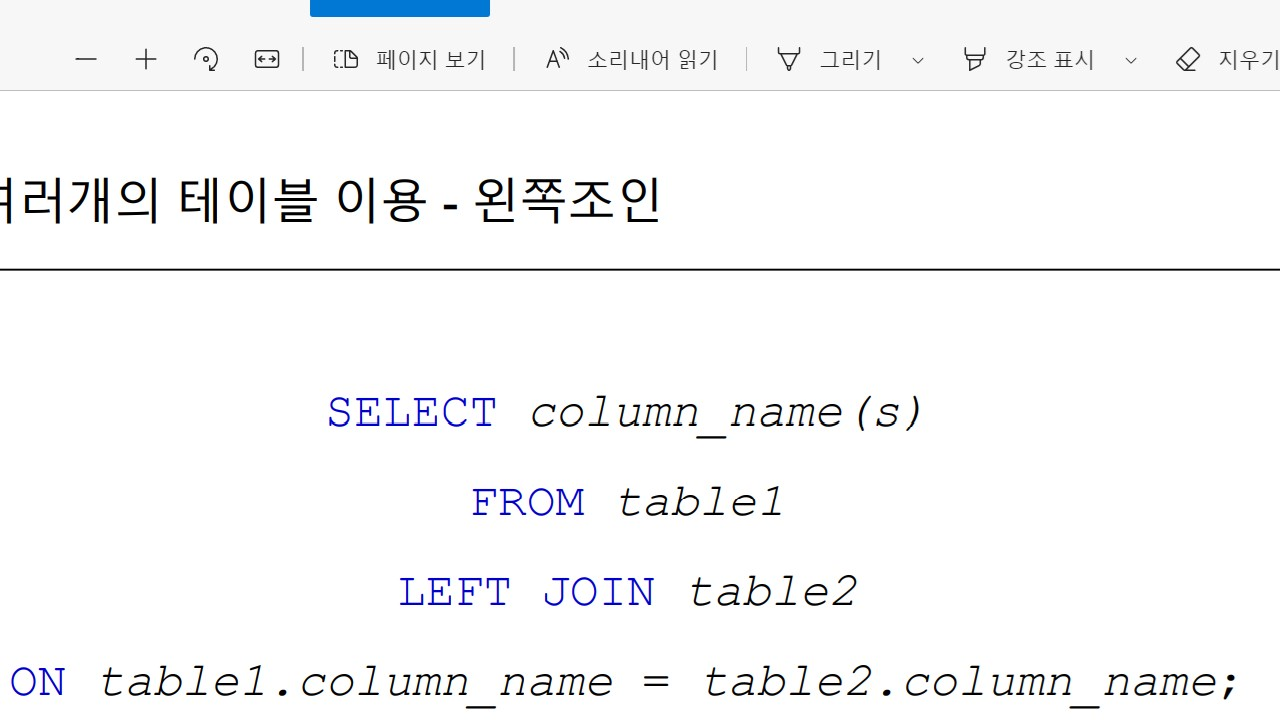